Intro

In [ ]:
# Install libraries
!pip install pybaseball
!pip install -U scikit-learn
import sys
print(sys.executable)
!pip show statsmodels




[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
/Users/nateseluga/Downloads/Batting Average Ability/Batting-Average-Ability/.venv/bin/python
Name: statsmodels
Version: 0.14.5
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: 
Author-email: 
License: BSD License
Location: /Users/nateseluga/Downloads/Batting Average Ability/Batting-Average-Ability/.venv/lib/python3.13/site-packages
Requires: numpy, packaging, pandas, patsy, scipy
Required-by: 


In [ ]:
from pybaseball import batting_stats
import pandas as pd

# Define the seasons you want
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

# Download and combine data for all years
dfs = []
for year in years:
    df_year = batting_stats(year, qual=100)
    df_year["season"] = year
    dfs.append(df_year)

# Combine into one DataFrame
df_all = pd.concat(dfs, ignore_index=True)

# Preview and save
print(df_all.shape)
print(df_all.head())

(4375, 321)
    IDfg  Season              Name Team  Age    G   AB   PA    H   1B  ...  \
0  11579    2015      Bryce Harper  WSN   22  153  521  654  172   91  ...   
1  10155    2015        Mike Trout  LAA   23  159  575  682  172   93  ...   
2   5038    2015    Josh Donaldson  TOR   29  158  620  711  184  100  ...   
3   4314    2015        Joey Votto  CIN   31  158  545  695  171  107  ...   
4   9218    2015  Paul Goldschmidt  ARI   27  159  567  695  182  109  ...   

   HardHit  HardHit%  Events  CStr%   CSW%    xBA   xSLG  xwOBA  L-WAR  season  
0      188     0.477     394  0.118  0.226  0.293  0.543  0.418    9.3    2015  
1      205     0.486     422  0.207  0.282  0.297  0.588  0.422    9.3    2015  
2      233     0.467     499  0.145  0.255  0.279  0.542  0.388    8.7    2015  
3      175     0.425     412  0.177  0.254  0.289  0.542  0.423    7.3    2015  
4      197     0.465     424  0.181  0.266  0.279  0.558  0.403    7.2    2015  

[5 rows x 321 columns]


Kept 25 columns. Missing: none
(4375, 25)
      id              name team  season   pa    avg  babip  bb_rate  k_rate  \
0  11579      Bryce Harper  WSN    2015  654  0.330  0.369    0.190   0.200   
1  10155        Mike Trout  LAA    2015  682  0.299  0.344    0.135   0.232   
2   5038    Josh Donaldson  TOR    2015  711  0.297  0.314    0.103   0.187   
3   4314        Joey Votto  CIN    2015  695  0.314  0.371    0.206   0.194   
4   9218  Paul Goldschmidt  ARI    2015  695  0.321  0.382    0.170   0.217   

   sprint_speed  ...  zcontact  contact     ld     gb     fb   iffb  hr_fb  \
0           3.1  ...     0.844    0.754  0.222  0.385  0.393  0.058  0.273   
1           5.0  ...     0.877    0.800  0.244  0.372  0.384  0.025  0.253   
2           4.5  ...     0.828    0.760  0.173  0.448  0.379  0.096  0.218   
3           3.7  ...     0.825    0.791  0.250  0.422  0.328  0.015  0.216   
4           4.6  ...     0.825    0.777  0.234  0.416  0.350  0.054  0.223   

    pull   opp

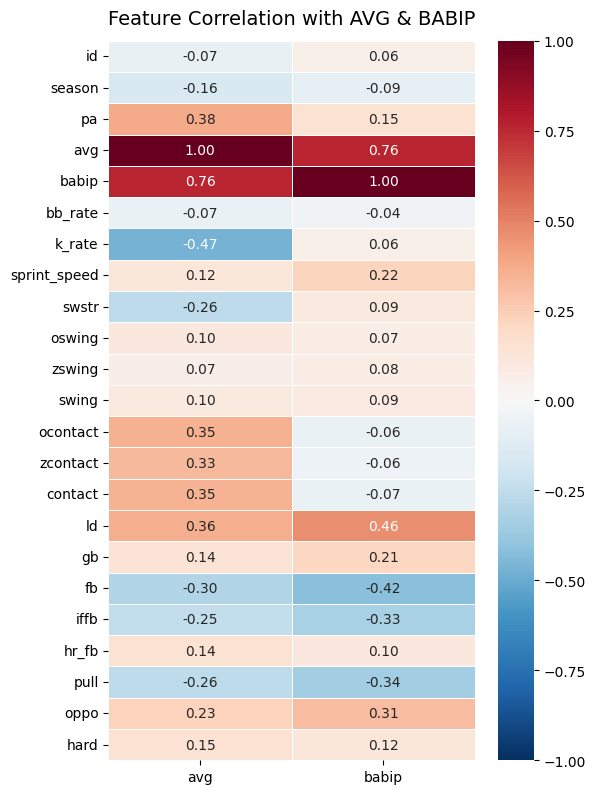


Top 10 correlated features with AVG:
avg         1.000000
babip       0.764403
pa          0.378146
ld          0.362976
ocontact    0.354882
contact     0.348364
zcontact    0.325951
oppo        0.227152
hard        0.150667
hr_fb       0.143744
Name: avg, dtype: float64

Top 10 correlated features with BABIP:
babip           1.000000
avg             0.764403
ld              0.462252
oppo            0.310882
sprint_speed    0.223371
gb              0.211896
pa              0.154171
hard            0.122089
hr_fb           0.102365
swstr           0.094952
Name: babip, dtype: float64


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# columns we want to consider
cols = [
    'IDfg','Name','Team','Season','PA','AVG','BABIP','BB%','K%','Spd',
    'SwStr%','O-Swing%','Z-Swing%','Swing%','O-Contact%','Z-Contact%','Contact%',
    'LD%','GB%','FB%','IFFB%','HR/FB','Pull%','Oppo%','Hard%'
]

# keep only the intersection
available = [c for c in cols if c in df_all.columns]
missing = [c for c in cols if c not in df_all.columns]

df_focus = df_all[available].copy()
print(f"Kept {len(available)} columns. Missing: {missing if missing else 'none'}")

# standardize column names to snake_case
rename_map = {
    'IDfg': 'id', 'Name': 'name', 'Team': 'team', 'Season': 'season', 'PA': 'pa',
    'AVG': 'avg', 'BABIP': 'babip', 'BB%': 'bb_rate', 'K%': 'k_rate', 'Spd': 'sprint_speed',
    'SwStr%': 'swstr', 'O-Swing%': 'oswing', 'Z-Swing%': 'zswing', 'Swing%': 'swing',
    'O-Contact%': 'ocontact', 'Z-Contact%': 'zcontact', 'Contact%': 'contact',
    'LD%': 'ld', 'GB%': 'gb', 'FB%': 'fb', 'IFFB%': 'iffb', 'HR/FB': 'hr_fb',
    'Pull%': 'pull', 'Oppo%': 'oppo', 'Hard%': 'hard'
}
df_focus.rename(columns=rename_map, inplace=True)

# Preview and save
print(df_focus.shape)
print(df_focus.head())

# filter to meaningful seasons
MIN_PA = 200
df_corr = df_focus[df_focus['pa'] >= MIN_PA].copy()

# select numeric columns (ignore id/name/team)
num_cols = df_corr.select_dtypes(include=[np.number]).columns.tolist()

# compute correlation matrix
corr = df_corr[num_cols].corr()

# extract only features vs AVG and BABIP
targets = ['avg', 'babip']
corr_targets = corr[targets].copy()

# plot
plt.figure(figsize=(6, max(4, 0.35 * len(corr_targets))))
sns.heatmap(corr_targets, cmap='RdBu_r', center=0, vmin=-1, vmax=1,
            linewidths=0.5, annot=True, fmt=".2f")
plt.title("Feature Correlation with AVG & BABIP", fontsize=14, pad=12)
plt.tight_layout()
plt.show()

# optional: quick sorted correlations to inspect top signals
print("\nTop 10 correlated features with AVG:")
print(corr_targets['avg'].sort_values(ascending=False).head(10))
print("\nTop 10 correlated features with BABIP:")
print(corr_targets['babip'].sort_values(ascending=False).head(10))

In [ ]:
# =============================================================================
# ORION: DATA CLEANING AND PROCESSING (STEP 2)
# =============================================================================

import pandas as pd
import numpy as np

print("STEP 2: CLEAN AND PROCESS DATA")
print("=" * 40)

# Start with the focused dataset
df_clean = df_focus.copy()
print(f"Starting: {df_clean.shape}")

# 1. EXPLORATORY DATA ANALYSIS
print("\n1. Data Info:")
print(f"Shape: {df_clean.shape}")
print(f"Missing values: {df_clean.isnull().sum().sum()}")
print(f"Data types: {df_clean.dtypes.value_counts().to_dict()}")

# 2. REMOVE COLUMNS WITH LOTS OF MISSING DATA (>50%)
missing_pct = (df_clean.isnull().sum() / len(df_clean)) * 100
cols_to_drop = missing_pct[missing_pct > 50].index.tolist()
if cols_to_drop:
    df_clean = df_clean.drop(columns=cols_to_drop)
    print(f"\n2. Removed {len(cols_to_drop)} columns with >50% missing data")

# 3. REMOVE DUPLICATE PLAYERS (keep highest PA)
duplicates_before = df_clean.duplicated(subset=['name', 'season']).sum()
df_clean = df_clean.sort_values('pa', ascending=False).drop_duplicates(subset=['name', 'season'], keep='first')
print(f"\n3. Removed {duplicates_before} duplicate player-season combinations")

# 4. HANDLE TEXT DATA
# Convert team to dummy variables
if 'team' in df_clean.columns:
    team_dummies = pd.get_dummies(df_clean['team'], prefix='team')
    df_clean = pd.concat([df_clean, team_dummies], axis=1).drop(columns=['team'])

# Convert name to numeric ID (simple approach without sklearn)
if 'name' in df_clean.columns:
    unique_names = df_clean['name'].unique()
    name_to_id = {name: idx for idx, name in enumerate(unique_names)}
    df_clean['player_id'] = df_clean['name'].map(name_to_id)
    df_clean = df_clean.drop(columns=['name'])

print(f"\n4. Handled text data: {df_clean.shape}")

# 5. CONVERT DATA TYPES
for col in df_clean.columns:
    if col in ['id', 'season', 'player_id']:
        df_clean[col] = df_clean[col].astype('int32')
    else:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# 6. REMOVE OUTLIERS (conservative 3*IQR rule)
key_cols = ['avg', 'babip', 'pa', 'bb_rate', 'k_rate', 'sprint_speed']
initial_rows = len(df_clean)

for col in key_cols:
    if col in df_clean.columns:
        Q1, Q3 = df_clean[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        bounds = (Q1 - 3*IQR, Q3 + 3*IQR)
        df_clean = df_clean[(df_clean[col] >= bounds[0]) & (df_clean[col] <= bounds[1])]

print(f"\n5-6. Removed {initial_rows - len(df_clean)} outliers, converted data types")

# 7. FINAL CLEANUP
# Fill remaining missing values
df_clean = df_clean.fillna(df_clean.median(numeric_only=True))

print(f"\n7. Final dataset: {df_clean.shape}")
print(f"Missing values: {df_clean.isnull().sum().sum()}")

# Save cleaned data
df_clean.to_csv("cleaned_batting_data.csv", index=False)
print(f"\nCleaned data saved to: cleaned_batting_data.csv")
print("DATA CLEANING COMPLETE!")


STEP 2: CLEAN AND PROCESS DATA
Starting: (4375, 25)

1. Data Info:
Shape: (4375, 25)
Missing values: 0
Data types: {dtype('float64'): 20, dtype('int64'): 3, dtype('O'): 2}

3. Removed 0 duplicate player-season combinations

4. Handled text data: (4375, 55)

5-6. Removed 1 outliers, converted data types

7. Final dataset: (4374, 55)
Missing values: 0

Cleaned data saved to: cleaned_batting_data.csv
DATA CLEANING COMPLETE!


In [ ]:
# Bell Train/Test Splitting
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
import pandas as pd
from sklearn.model_selection import train_test_split

# Load proccessed data
df = pd.read_csv('cleaned_batting_data.csv')

# Set X and Y
X = df.drop(columns=['avg'])
Y = df["avg"]

# Split traning and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Save datasets as csv
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
Y_train.to_csv('Y_train.csv', index=False)
Y_test.to_csv('Y_test.csv', index=False)

STEP 3: LINEAR REGRESSION (AVG)
Train: X=(1108, 54)  Y=(1108,)
Test:  X=(277, 54)   Y=(277,)

Performance:
Train -> MAE: 0.0032 | RMSE: 0.0044 | R2: 0.9839
Test  -> MAE: 0.0034 | RMSE: 0.0048 | R2: 0.9821

Top 15 absolute coefficients:
     feature  coefficient
0      babip     0.685177
1     k_rate    -0.346406
2         fb     0.243525
3         gb     0.182736
4      hr_fb     0.180759
5         ld     0.179948
6    bb_rate    -0.074018
7      swstr     0.066342
8      swing     0.050917
9   zcontact     0.048686
10    oswing    -0.039764
11   contact    -0.039097
12  ocontact     0.031295
13    zswing    -0.019614
14      hard     0.018156


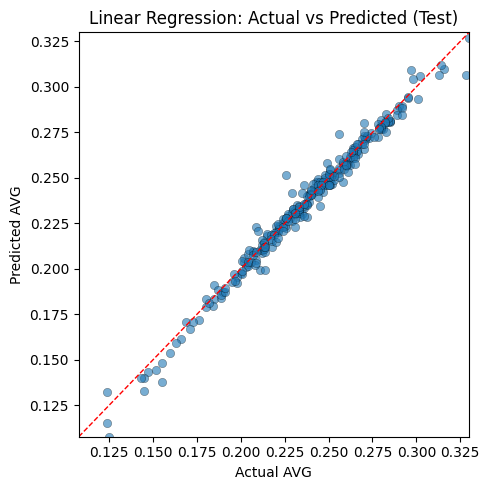


Saved model -> linear_regression_avg.pkl
Saved coefficients -> linear_regression_coefficients.csv


In [ ]:
# Linear Regression Model Training
# - Trains a baseline LinearRegression to predict AVG
# - Evaluates with MAE, RMSE, R2
# - Shows top coefficients and saves the model/coeffs

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt

# -----------------------------
# Load data
# -----------------------------
X_train = pd.read_csv("X_train.csv")
X_test  = pd.read_csv("X_test.csv")
Y_train = pd.read_csv("Y_train.csv").squeeze("columns")
Y_test  = pd.read_csv("Y_test.csv").squeeze("columns")

# Defensive: ensure target is numeric
Y_train = pd.to_numeric(Y_train, errors="coerce")
Y_test  = pd.to_numeric(Y_test, errors="coerce")

# Drop any rows with missing targets (should be none)
mask_tr = ~Y_train.isna()
mask_te = ~Y_test.isna()
X_train_lr = X_train.loc[mask_tr].copy()
Y_train_lr = Y_train.loc[mask_tr].copy()
X_test_lr  = X_test.loc[mask_te].copy()
Y_test_lr  = Y_test.loc[mask_te].copy()

print("STEP 3: LINEAR REGRESSION (AVG)")
print("=" * 40)
print(f"Train: X={X_train_lr.shape}  Y={Y_train_lr.shape}")
print(f"Test:  X={X_test_lr.shape}   Y={Y_test_lr.shape}")

# -----------------------------
# Fit model
# -----------------------------
lin = LinearRegression()
lin.fit(X_train_lr, Y_train_lr)

# -----------------------------
# Evaluate
# -----------------------------
train_pred = lin.predict(X_train_lr)
test_pred  = lin.predict(X_test_lr)

mae_tr = mean_absolute_error(Y_train_lr, train_pred)
mse_tr = mean_squared_error(Y_train_lr, train_pred)
rmse_tr = np.sqrt(mse_tr)
r2_tr = r2_score(Y_train_lr, train_pred)

mae_te = mean_absolute_error(Y_test_lr, test_pred)
mse_te = mean_squared_error(Y_test_lr, test_pred)
rmse_te = np.sqrt(mse_te)
r2_te = r2_score(Y_test_lr, test_pred)

print("\nPerformance:")
print(f"Train -> MAE: {mae_tr:.4f} | RMSE: {rmse_tr:.4f} | R2: {r2_tr:.4f}")
print(f"Test  -> MAE: {mae_te:.4f} | RMSE: {rmse_te:.4f} | R2: {r2_te:.4f}")

# -----------------------------
# Coefficients
# -----------------------------
coefs = pd.Series(lin.coef_, index=X_train_lr.columns).sort_values(key=np.abs, ascending=False)
coef_df = pd.DataFrame({"feature": coefs.index, "coefficient": coefs.values})
print("\nTop 15 absolute coefficients:")
print(coef_df.head(15))

# Save coefficients for later inspection
coef_df.to_csv("linear_regression_coefficients.csv", index=False)

# -----------------------------
# Quick scatter: actual vs predicted (test)
# -----------------------------
plt.figure(figsize=(5,5))
plt.scatter(Y_test_lr, test_pred, alpha=0.6, edgecolor="k", linewidth=0.3)
lims = [min(Y_test_lr.min(), test_pred.min()), max(Y_test_lr.max(), test_pred.max())]
plt.plot(lims, lims, "r--", lw=1)
plt.xlim(lims); plt.ylim(lims)
plt.xlabel("Actual AVG")
plt.ylabel("Predicted AVG")
plt.title("Linear Regression: Actual vs Predicted (Test)")
plt.tight_layout()
plt.show()

# -----------------------------
# Persist model
# -----------------------------
joblib.dump(lin, "linear_regression_avg.pkl")
print("\nSaved model -> linear_regression_avg.pkl")
print("Saved coefficients -> linear_regression_coefficients.csv")

# TODO: not include babip as a coefficient (perhaps as a seperate regression model)


In [ ]:
# Random Forest Model Training
# Source: https://kirenz.github.io/regression/docs/randomforest.html
from collections import OrderedDict


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
import joblib

X_rf_train = pd.read_csv("X_train.csv")
X_rf_test = pd.read_csv("X_test.csv")
Y_rf_train = pd.read_csv("Y_train.csv")
Y_rf_test = pd.read_csv("Y_test.csv")

# currently does not inclue babip since it has a dominant effect/ hinders our ability to analyze other stats
selected_features = ["gb","fb","iffb","hard","pull","oppo","sprint_speed", "contact", "zcontact", "swing", "zswing", "oswing"]

X_rf_train = X_rf_train[selected_features]
X_rf_test = X_rf_test[selected_features]

# make flatten array
Y_rf_train = np.ravel(Y_rf_train)
Y_rf_test = np.ravel(Y_rf_test)


# define hyperparamerters
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "warm_start":True,
    "oob_score":True,
    "random_state": 42,
}

# build model
reg =RandomForestRegressor(**params)

reg.fit(X_rf_train, Y_rf_train)

RandomForestRegressor(max_depth=4, min_samples_split=5, n_estimators=500,
                      oob_score=True, random_state=42, warm_start=True)

#make prediction
Y_pred = reg.predict(X_rf_test)

# evaluate model with MSE
rmse = np.sqrt(mean_squared_error(Y_rf_test, Y_pred,))
print("Root mean squre error:", rmse)


# obtain feature importance
feature_importance = reg.feature_importances_

# sort features according to importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

# plot feature importances
plt.barh(pos, feature_importance[sorted_idx], align="center")

plt.yticks(pos, np.array(selected_features)[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity");

# save model
print('saved model:')
joblib.dump(reg, "rf_avg_model.pkl")

In [ ]:
# Mixed effects Model Training with CLR transform for compositional data
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

# --- BABIP feature selection ---
X_train = pd.read_csv("X_train.csv")
X_test  = pd.read_csv("X_test.csv")

babip_raw = ["ld","gb","fb","iffb","hard","pull","oppo","sprint_speed"]
carry_cols = ["id","season","pa"]

needed = babip_raw + carry_cols
missing_tr = [c for c in needed if c not in X_train.columns]
missing_te = [c for c in needed if c not in X_test.columns]

if missing_tr or missing_te:
    base = pd.read_csv("cleaned_batting_data.csv")
    join_keys = [k for k in ["id","season"] if k in X_train.columns and k in base.columns]
    if not join_keys:
        raise KeyError("Need join keys ('id','season') in X_train and cleaned_batting_data.csv to fetch missing columns.")
    fetch_cols = list(set(needed + join_keys))
    X_train = X_train.merge(base[fetch_cols].drop_duplicates(join_keys), on=join_keys, how="left")
    X_test  = X_test.merge(base[fetch_cols].drop_duplicates(join_keys),  on=join_keys, how="left")

X_babip_train = X_train[needed].copy()
X_babip_test  = X_test[needed].copy()

base = pd.read_csv("cleaned_batting_data.csv")

join_keys = [k for k in ["id","season"] if k in X_babip_train.columns and k in base.columns]
if not join_keys:
    raise KeyError("Need 'id' and/or 'season' in both X_babip_* and cleaned_batting_data.csv")

train_babip = X_babip_train.merge(
    base[join_keys + ["babip"]].drop_duplicates(join_keys),
    on=join_keys, how="left"
)
test_babip = X_babip_test.merge(
    base[join_keys + ["babip"]].drop_duplicates(join_keys),
    on=join_keys, how="left"
)

train_babip = train_babip.dropna(subset=["babip"]).copy()

# =============== CLR TRANSFORMATION FOR COMPOSITIONAL DATA ===============
def centered_log_ratio(df, comp_cols):
    """
    Apply centered log-ratio transform to compositional columns.
    CLR(x) = log(x) - mean(log(x)) for each row.
    """
    comp_data = df[comp_cols].values
    comp_data = np.clip(comp_data, 1e-6, 1)  # avoid log(0)
    log_comp = np.log(comp_data)
    log_mean = log_comp.mean(axis=1, keepdims=True)
    clr = log_comp - log_mean
    clr_cols = [f"clr_{c}" for c in comp_cols]
    return pd.DataFrame(clr, columns=clr_cols, index=df.index)

# --- Re-express IFFB and FB on the BIP scale ---
for _df in (train_babip, test_babip):
    _df["iffb_bip"] = (_df["fb"] * _df["iffb"]).clip(lower=0, upper=1)
    _df["fb_noI"]   = (_df["fb"] * (1 - _df["iffb"])).clip(lower=0, upper=1)

# Apply CLR to batted ball composition (LD, GB, FB_noIFFB) on the BIP scale
comp_cols = ["ld", "gb", "fb_noI"]
other_features = ["iffb_bip","hard","pull","oppo","sprint_speed"]

train_clr = centered_log_ratio(train_babip, comp_cols)
test_clr  = centered_log_ratio(test_babip,  comp_cols)

# Combine CLR features with other features
train_babip_clr = pd.concat([
    train_babip[["id","season","pa","babip"]].reset_index(drop=True),
    train_clr.reset_index(drop=True),
    train_babip[other_features].reset_index(drop=True)
], axis=1)

test_babip_clr = pd.concat([
    test_babip[["id","season","pa","babip"]].reset_index(drop=True),
    test_clr.reset_index(drop=True),
    test_babip[other_features].reset_index(drop=True)
], axis=1)

# Drop clr_fb_noI - use non-IFFB fly balls as reference category
babip_fixed = ["clr_ld", "clr_gb"] + other_features

# --- Standardize all features (including CLR) ---
scaler = StandardScaler().fit(train_babip_clr[babip_fixed])
train_babip_s = train_babip_clr.copy()
test_babip_s  = test_babip_clr.copy()
train_babip_s[babip_fixed] = scaler.transform(train_babip_clr[babip_fixed])
test_babip_s[babip_fixed]  = scaler.transform(test_babip_clr[babip_fixed])

# =============== PA-weighting via row replication ===============
pa = train_babip_s["pa"].astype(float)
w_float = pa / np.median(pa)
w_int   = np.clip(np.rint(w_float), 1, 20).astype(int)

idx = np.arange(len(train_babip_s))
rep_idx = np.repeat(idx, w_int)
train_exp = train_babip_s.iloc[rep_idx].copy()

# MixedLM setup
train_exp["id"] = train_exp["id"].astype("category")
test_babip_s["id"]  = test_babip_s["id"].astype("category")

# Model formula with ONLY clr_ld and clr_gb (NOT clr_fb)
formula = "babip ~ " + " + ".join(babip_fixed)

# Try multiple fitting methods
md = smf.mixedlm(
    formula=formula,
    data=train_exp,
    groups=train_exp["id"],
    re_formula="1"
)

fit_babip = None
methods = [
    ("lbfgs", {"maxiter": 500, "reml": True}),
    ("bfgs", {"maxiter": 500, "reml": True}),
    ("powell", {"maxiter": 500, "reml": True})
]

for method, kwargs in methods:
    try:
        fit_babip = md.fit(method=method, **kwargs, disp=False)
        if fit_babip.converged:
            break
    except Exception as e:
        continue

if fit_babip is None:
    raise RuntimeError("All optimization methods failed")

# Predictions
train_pred = fit_babip.predict(train_babip_s)
test_pred  = fit_babip.predict(test_babip_s)

# =============== MODEL EVALUATION ===============
def wmae(y, yhat, w):
    return np.average(np.abs(y - yhat), weights=w)

def wrmse(y, yhat, w):
    return np.sqrt(np.average((y - yhat)**2, weights=w))

y_tr, y_te = train_babip_s["babip"].values, test_babip_s["babip"].values
w_tr, w_te = train_babip_s["pa"].values,     test_babip_s["pa"].values

print("\n" + "="*70)
print("BABIP MODEL PERFORMANCE")
print("="*70)

# Training metrics
train_mae = mean_absolute_error(y_tr, train_pred)
train_rmse = np.sqrt(mean_squared_error(y_tr, train_pred))
train_r2 = r2_score(y_tr, train_pred)
train_wmae = wmae(y_tr, train_pred, w_tr)
train_wrmse = wrmse(y_tr, train_pred, w_tr)

# Test metrics
test_mae = mean_absolute_error(y_te, test_pred)
test_rmse = np.sqrt(mean_squared_error(y_te, test_pred))
test_r2 = r2_score(y_te, test_pred)
test_wmae = wmae(y_te, test_pred, w_te)
test_wrmse = wrmse(y_te, test_pred, w_te)

print("\nAccuracy Metrics:")
print(f"  Train R²:        {train_r2:.4f}  |  Test R²:        {test_r2:.4f}")
print(f"  Train MAE:       {train_mae:.4f}  |  Test MAE:       {test_mae:.4f}")
print(f"  Train RMSE:      {train_rmse:.4f}  |  Test RMSE:      {test_rmse:.4f}")
print(f"  PA-Weighted MAE: {train_wmae:.4f}  |  PA-Weighted MAE: {test_wmae:.4f}")
print(f"  PA-Weighted RMSE:{train_wrmse:.4f}  |  PA-Weighted RMSE:{test_wrmse:.4f}")

# Generalization check
mae_gap = test_mae - train_mae
r2_gap = train_r2 - test_r2
print(f"\nGeneralization:")
print(f"  R² gap:  {r2_gap:+.4f} {'⚠ Possible overfitting' if r2_gap > 0.1 else '✓ Good'}")
print(f"  MAE gap: {mae_gap:+.4f} {'⚠ Possible overfitting' if mae_gap > 0.005 else '✓ Good'}")

# Random effects
re_variance = fit_babip.cov_re.iloc[0, 0] if hasattr(fit_babip, 'cov_re') else 0.0
residual_variance = fit_babip.scale
icc = re_variance / (re_variance + residual_variance)
print(f"\nRandom Effects ICC: {icc:.4f} ({icc*100:.1f}% variance is between-player)")

# =============== FEATURE IMPORTANCE ===============
print("\n" + "="*70)
print("FEATURE IMPORTANCE (Ranked by Impact)")
print("="*70)

params = fit_babip.params
pvalues = fit_babip.pvalues

def sig_stars(p):
    if p < 0.001: return "***"
    if p < 0.01: return "**"
    if p < 0.05: return "*"
    return ""

# Collect all features with their coefficients
feature_impacts = []
feature_names = {
    "clr_ld": "Line Drives (vs FB)",
    "clr_gb": "Ground Balls (vs FB)",
    "iffb_bip": "Infield Fly Balls",
    "hard": "Hard Contact",
    "pull": "Pull Direction",
    "oppo": "Opposite Field",
    "sprint_speed": "Sprint Speed"
}

for coef_name in babip_fixed:
    if coef_name in params:
        val = params[coef_name]
        p = pvalues.get(coef_name, 1.0)
        display_name = feature_names.get(coef_name, coef_name)
        feature_impacts.append((display_name, val, p))

# Sort by absolute value of coefficient (impact magnitude)
feature_impacts.sort(key=lambda x: abs(x[1]), reverse=True)

print("\nRanked by magnitude (standardized coefficients):")
for i, (name, coef, p) in enumerate(feature_impacts, 1):
    direction = "↑" if coef > 0 else "↓"
    print(f"  {i}. {name:25s} {direction} {abs(coef):.4f} {sig_stars(p)}")

print("\n(*** p<0.001, ** p<0.01, * p<0.05)")

# Save predictions
pred_train = train_babip_s[["id","season"]].copy()
pred_test  = test_babip_s[["id","season"]].copy()
pred_train["babip_actual"] = y_tr
pred_train["babip_pred"] = train_pred
pred_train["residual"] = y_tr - train_pred
pred_test["babip_actual"] = y_te
pred_test["babip_pred"] = test_pred
pred_test["residual"] = y_te - test_pred

pred_train.to_csv("pred_babip_train.csv", index=False)
pred_test.to_csv("pred_babip_test.csv", index=False)
train_babip_s.to_csv("train_babip_clr_features.csv", index=False)
test_babip_s.to_csv("test_babip_clr_features.csv", index=False)

print("\n" + "="*70)
print("✓ MODEL TRAINING COMPLETE - Predictions saved")
print("="*70)

/Users/nateseluga/Downloads/Batting Average Ability/Batting-Average-Ability/.venv/lib/python3.13/site-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)



BABIP MODEL PERFORMANCE

Accuracy Metrics:
  Train R²:        0.3763  |  Test R²:        0.3527
  Train MAE:       0.0255  |  Test MAE:       0.0266
  Train RMSE:      0.0332  |  Test RMSE:      0.0337
  PA-Weighted MAE: 0.0226  |  PA-Weighted MAE: 0.0238
  PA-Weighted RMSE:0.0293  |  PA-Weighted RMSE:0.0300

Generalization:
  R² gap:  +0.0237 ✓ Good
  MAE gap: +0.0012 ✓ Good

Random Effects ICC: 0.1876 (18.8% variance is between-player)

FEATURE IMPORTANCE (Ranked by Impact)

Ranked by magnitude (standardized coefficients):
  1. Line Drives (vs FB)       ↑ 0.0175 ***
  2. Sprint Speed              ↑ 0.0087 ***
  3. Hard Contact              ↑ 0.0082 ***
  4. Infield Fly Balls         ↓ 0.0080 ***
  5. Ground Balls (vs FB)      ↑ 0.0067 ***
  6. Pull Direction            ↓ 0.0031 ***
  7. Opposite Field            ↑ 0.0019 *

(*** p<0.001, ** p<0.01, * p<0.05)

✓ MODEL TRAINING COMPLETE - Predictions saved


/Users/nateseluga/Downloads/Batting Average Ability/Batting-Average-Ability/.venv/lib/python3.13/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
